In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import cv2

from sklearn.model_selection import train_test_split

import torch 
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
import pytorch_lightning as pl
import albumentations

from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

In [2]:
root_path = '/mnt/gpid08/datasets/remote_sensing/tmp_from_gpid07/honey/datasets/'
print(os.listdir(root_path))

['Eucalyptus sp.', 'Brassica', 'Taraxacum', 'Rosmarinus officinalis', 'Tilia', 'Erica.m', 'Lavandula', 'Cistus sp', 'Pinus', 'Cardus', 'Citrus sp', 'Helianthus annuus']


In [3]:
list_folders=os.listdir(root_path)

In [4]:
list_files = []
for (dirpath, dirnames, filenames) in os.walk(root_path):
        list_files += [os.path.join(dirpath, file) for file in filenames]
print(f'Total amount of files: {len(list_files)}')

Total amount of files: 8970


In [5]:
df = pd.DataFrame()
for folder in list_folders:
    df_f1 = pd.DataFrame({folder: os.listdir(root_path+folder) })
    df = pd.concat([df, df_f1], ignore_index=False, axis=1 )
df.head()

Eucalyptus sp.  \
0          Eucalyptus sp.-0-Sample_3_Capture_128.bmp   
1  Eucalyptus sp.-0-Sample_66_Echium_Lotus_Castan...   
2  Eucalyptus sp.-1-Sample_23_Euc_Ech_Coro_8.679_...   
3          Eucalyptus sp.-3-Sample_3_Capture_168.bmp   
4  Eucalyptus sp.-2-Sample_61_Olea_Brassica_Salix...   

                                            Brassica  \
0  Brassica-0-Sample_61_Olea_Brassica_Salix_0_28....   
1  Brassica-0-Sample_21_Rapseed_1105211748_3.5294...   
2  Brassica-1-Sample_21_Rapseed_27.596_9.269_0.78...   
3  Brassica-1-Sample_21_Rapseed_6.537_-2.756_0.71...   
4  Brassica-6-Sample_21_Rapseed_1105211320_1.4117...   

                                           Taraxacum  \
0  Taraxacum-0-Sample_72_Arbutus_Erica_0911211048...   
1  Taraxacum-0-Sample_46_Taraxacum_3003211226_15....   
2  Taraxacum-1-Sample_67_Citrus_0410211143_0_18.6...   
3  Taraxacum-0-Sample_67_Citrus_0410211004_0_23.4...   
4  Taraxacum-0-Sample_67_Citrus_0410211136_0_22.8...   

                              Rosmarinus officinalis  \
0  Rosmarinus officinalis-0-Sample_19_Rosmarinus_...   
1  Rosmarinus officinalis-0-Sample_19_Rosmarinus_...   
2  Rosmarinus officinalis-0-Sample_19_Rosmarinus_...   
3  Rosmarinus officinalis-0-Sample_75_Liliaceae_P...   
4  Rosmarinus officinalis-0-Sample_19_Rosmarinus_...   

                                               Tilia  \
0  Tilia-0-Sample_49_Tilia_Flor_3105211737_22.588...   
1  Tilia-0-Sample_47_Tilia_0706211343_0_21.205_2....   
2  Tilia-0-Sample_47_Tilia_0206211356_0_18.583_-1...   
3  Tilia-1-Sample_47_Tilia_0706211538_0_13.339_6....   
4  Tilia-3-Sample_53_Tilia_honey_3105211737_22.94...   

                                             Erica.m  \
0  Erica.m-4-Sample_72_Arbutus_Erica_0311211548_0...   
1  Vaccinium_m-0-Sample_64_Erica.t_Calluna_010921...   
2  Vaccinium_m-3-Sample_63_Rosmarinus_Prunus_0_23...   
3  Vaccinium_m-1-Sample_58_Vaccinium_myrtillus_29...   
4  Vaccinium_m-0-Sample_64_Erica.t_Calluna_020921...   

                                           Lavandula  \
0  Lavandula-4-Sample_71_Lavanda_Espliego_1810211...   
1  Lavandula-0-Sample_70_Cantueso_2010210942_0_30...   
2  Lavandula-0-Sample_70_Cantueso_1410211700_0_5....   
3  Lavandula-1-Sample_71_Lavanda_Espliego_2110211...   
4  Lavandula-3-Sample_71_Lavanda_Espliego_2110210...   

                                           Cistus sp  \
0  Cistus sp-4-Sample_62_Thymus_0_19.666667_0.000...   
1  Cistus sp-1-Sample_61_Olea_Brassica_Salix_0_26...   
2  Cistus sp-1-Sample_72_Arbutus_Erica_2311211327...   
3  Cistus sp-1-Sample_67_Citrus_0410211017_0_19.4...   
4  Cistus sp-1-Sample_62_Thymus_0709211156_0_12.3...   

                                               Pinus  \
0  Pinus-1-Sample_77_Pinus_Poaceae_2112211334_0_-...   
1  Pinus-1-Sample_77_Pinus_Poaceae_2112211254_0_3...   
2  Pinus-2-Sample_77_Pinus_Poaceae_2112211301_0_1...   
3  Pinus-0-Sample_32_PINUS_2603211549_21.529412_6...   
4  Pinus-1-Sample_17_sunflower_0709211301_0_2.192...   

                                              Cardus  \
0  Cardus-0-Sample_61_Olea_Brassica_Salix_0_22.73...   
1  Cardus-1-Sample_67_Citrus_2909211030_0_41.276_...   
2  Cardus-0-Sample_68_Persea_0410210944_0_43.1085...   
3  Cardus-0-Sample_68_Persea_0410210943_0_37.5421...   
4  Cardus-1-Sample_17_sunflower_0709211348_0_30.2...   

                                           Citrus sp  \
0  Citrus sp-0-Sample_67_Citrus_2909211453_0_9.00...   
1  Citrus sp-0-Citrus_no_fucsin_34.632_-0.556_0.8...   
2  Citrus sp-1-Sample_67_Citrus_2809211605_0_14.1...   
3  Citrus sp-0-Sample_67_Citrus_0410211045_0_22.2...   
4  Citrus sp-1-Sample_61_Olea_Brassica_Salix_2007...   

                                   Helianthus annuus  
0  Helianthus annuus-1-Sample_17_sunflower_070921...  
1  Helianthus annuus-1-Sample_17_sunflower_0_19.5...  
2  Helianthus annuus-0-Sample_22_imported_Ana_13....  
3  Helianthus annuus-1-Sample_22_imported_Ana_050...  
4  Helianthus annuus-1-Sample_44_Cardus_0_20.8257...

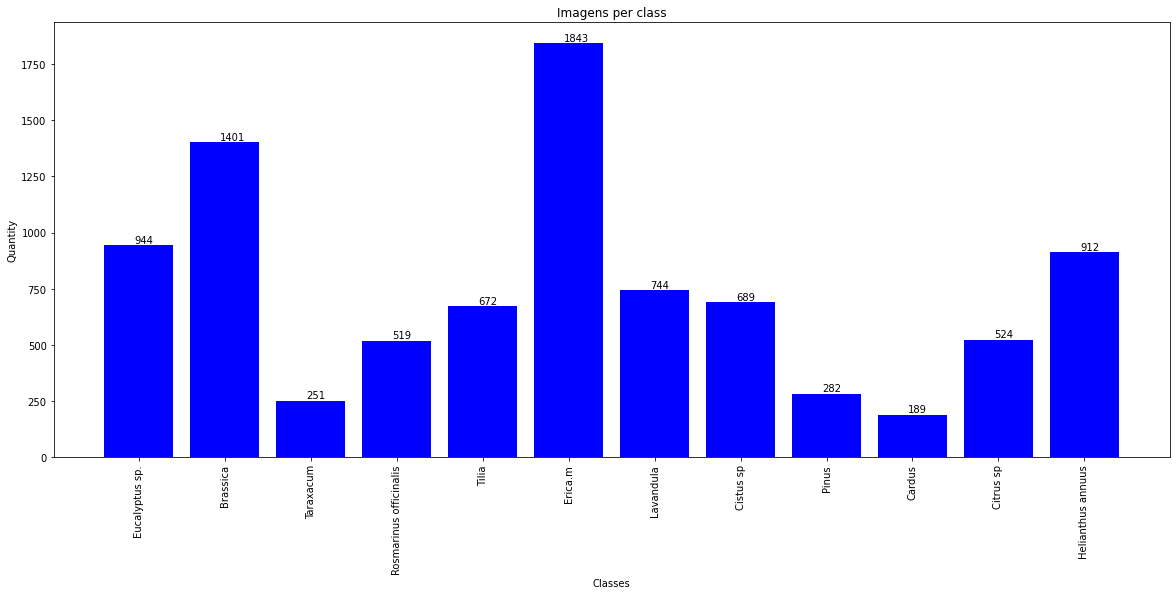

In [6]:
plt.figure(figsize=(20,8))
aa = len(df) - df.isna().sum(axis=0)
plt.bar(aa.index, aa, color='blue')
plt.xlabel('Classes')
plt.xticks(rotation=90)
plt.ylabel('Quantity')
plt.title('Imagens per class')

for index, value in enumerate(aa):
    plt.text(index-0.05, value+10, str(int(value)) )

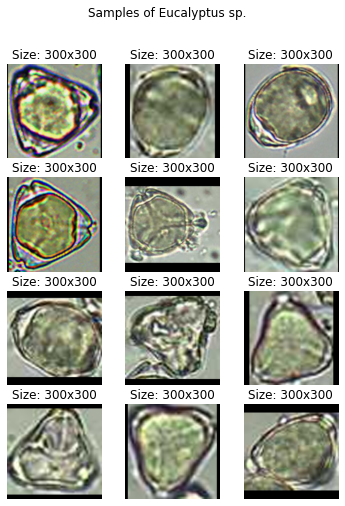

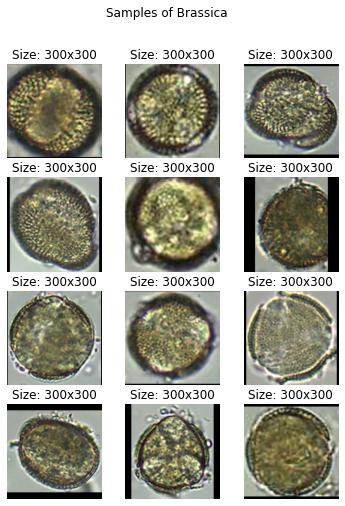

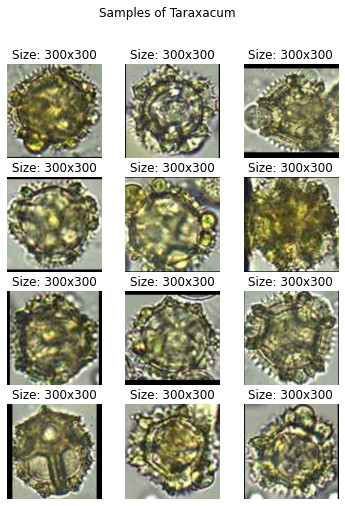

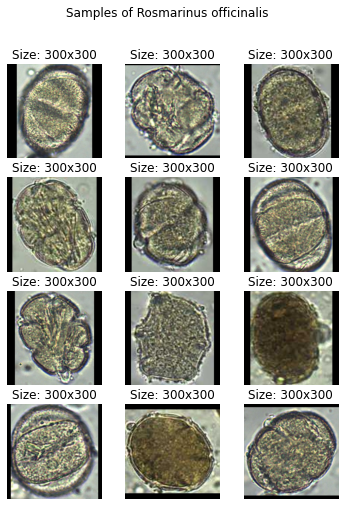

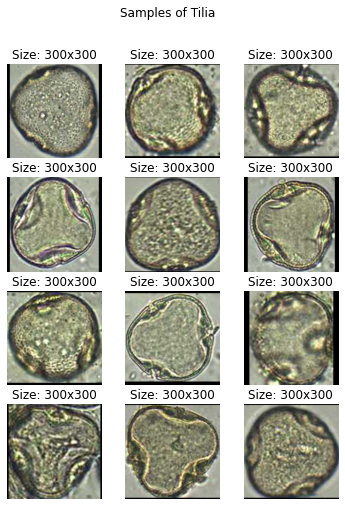

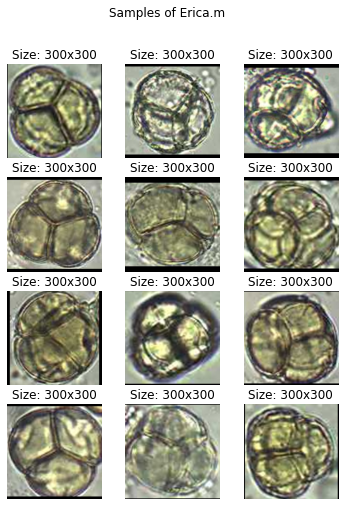

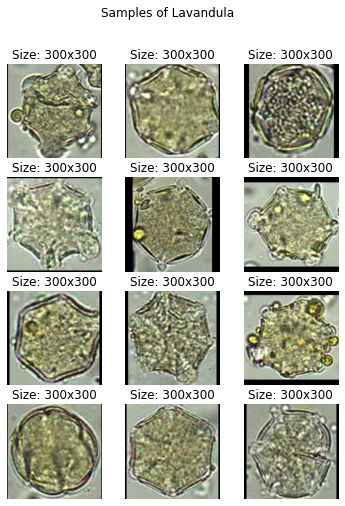

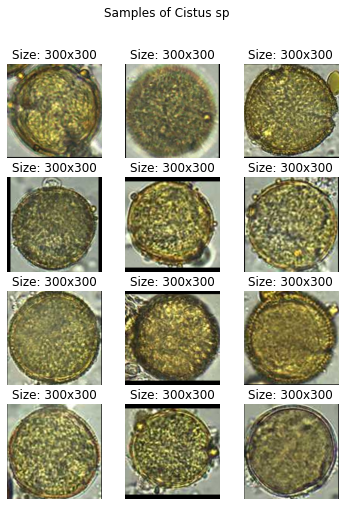

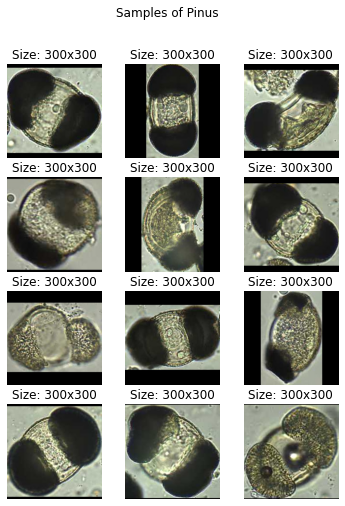

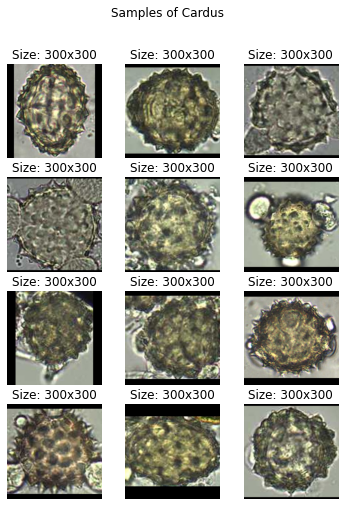

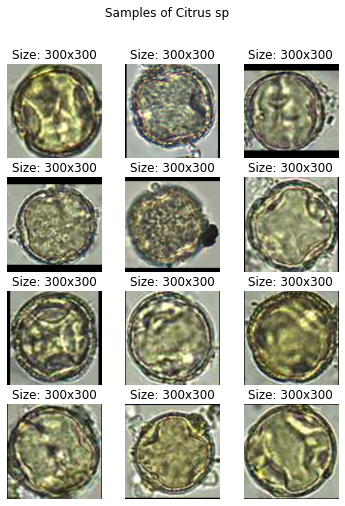

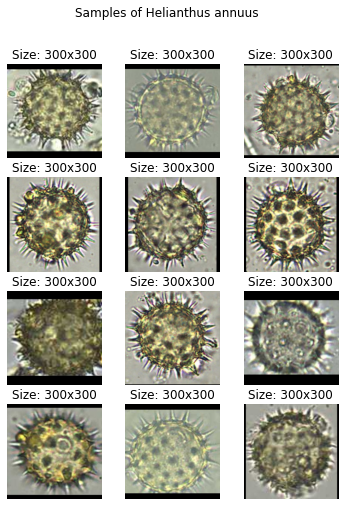

In [7]:
for ii in range(len(df.columns)):
    class_folder = df.columns[ii]
    ## from https://juansensio.com/blog/062_multihead_attention
    r, c = 4, 3
    fig = plt.figure(figsize=(c*2, r*2))
    fig.suptitle(f'Samples of {class_folder}')

    for _r in range(r):
        for _c in range(c):
            ix = _r*c + _c
            # ax = plt.subplot(r, c, ix + 1)
            ax = fig.add_subplot(r,c,ix+1)
            img = plt.imread(os.path.join(root_path, class_folder, df[class_folder][ix]))
            # , label = data['image'][ix], data['target'][ix]
            ax.axis("off")
            ax.imshow(img)
            ax.set_title(f'Size: {img.shape[0]}x{img.shape[1]}')
    # plt.tight_layout()
    plt.show()

In [8]:
def crop_padding(img):
    ## convert to gray
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    ## set threshold for 0
    _,thresh = cv2.threshold(img_gray,10,255,cv2.THRESH_BINARY)

    ## find contours
    contours, hierarchy = cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cnt = contours[0]
    x,y,w,h = cv2.boundingRect(cnt)

    crop = img[y:y+h,x:x+w,:]
    return crop


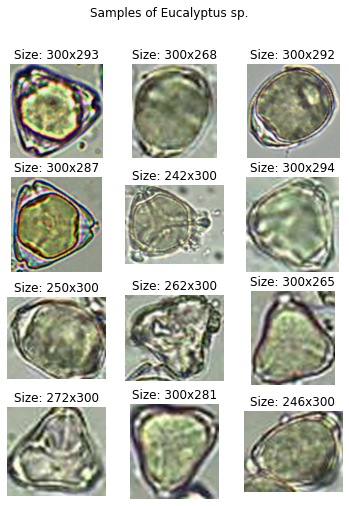

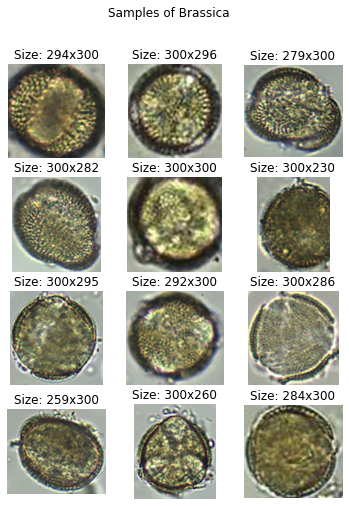

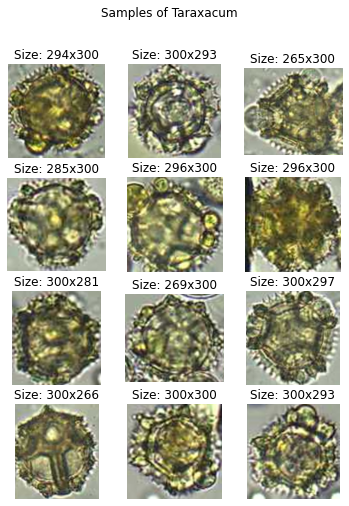

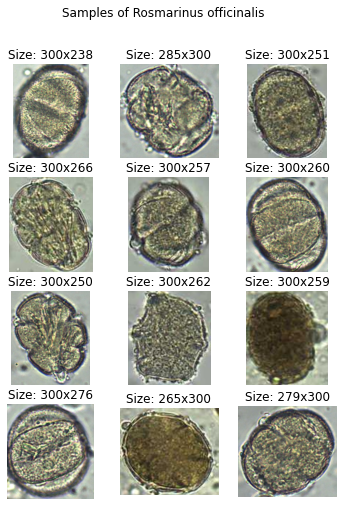

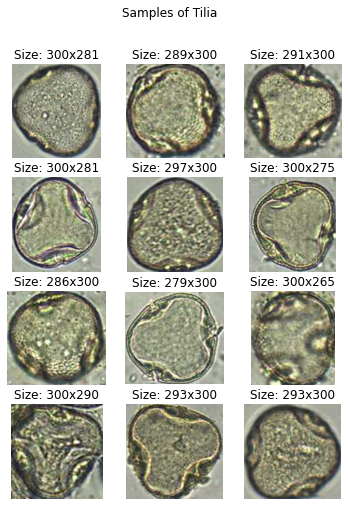

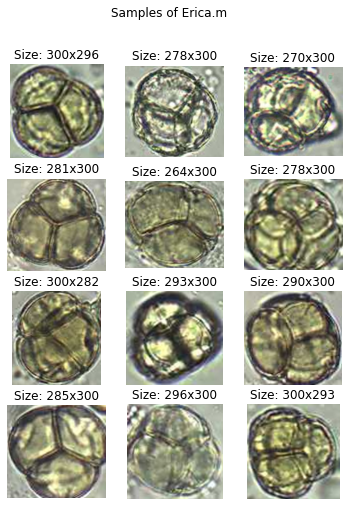

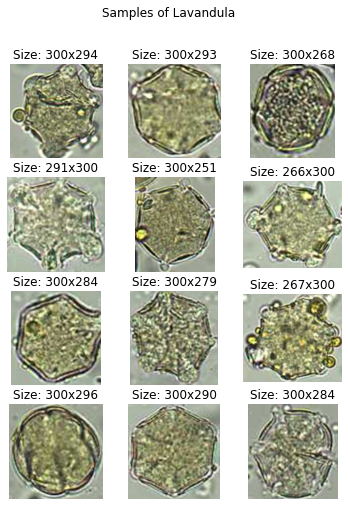

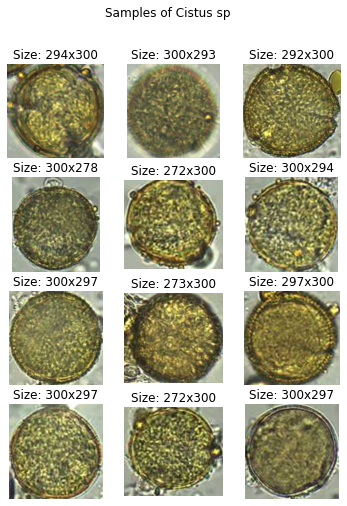

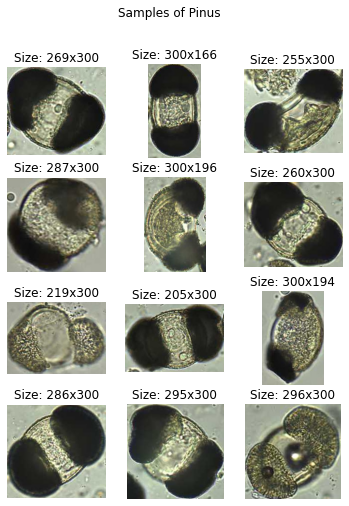

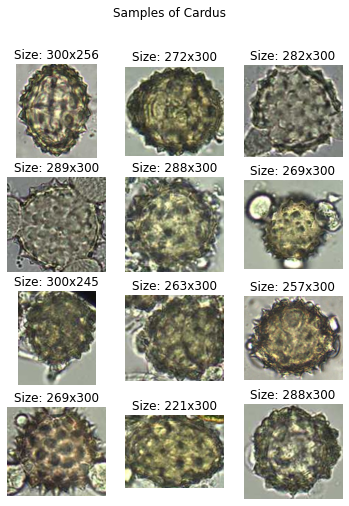

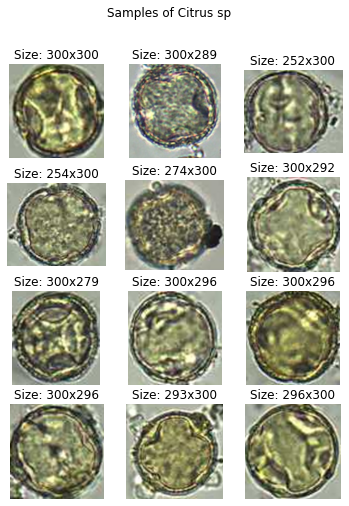

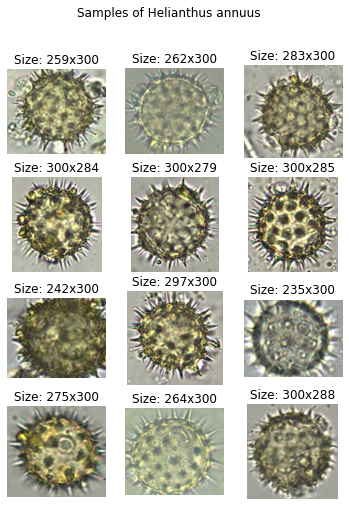

In [9]:
for ii in range(len(df.columns)):
    class_folder = df.columns[ii]
    ## from https://juansensio.com/blog/062_multihead_attention
    r, c = 4, 3
    fig = plt.figure(figsize=(c*2, r*2))
    fig.suptitle(f'Samples of {class_folder}')
    for _r in range(r):
        for _c in range(c):
            ix = _r*c + _c
            # ax = plt.subplot(r, c, ix + 1)
            ax = fig.add_subplot(r,c,ix+1)
            img = plt.imread(os.path.join(root_path, class_folder, df[class_folder][ix]))
            img = crop_padding(img)
            # , label = data['image'][ix], data['target'][ix]
            ax.axis("off")
            ax.imshow(img)
            ax.set_title(f'Size: {img.shape[0]}x{img.shape[1]}')
    # plt.tight_layout()
    plt.show()

## Partition of data in train-val-test subsets

In [10]:
list_files = []
labels=[]
for folder in list_folders:
    list_per_folder = os.listdir(os.path.join(root_path, folder))
    for file in list_per_folder:
        list_files += [os.path.join(root_path, folder, file) ]
        labels += [folder]


In [11]:
df = pd.DataFrame({"name":list_files,"labels":labels})
df.head()

name          labels
0  /mnt/gpid08/datasets/remote_sensing/tmp_from_g...  Eucalyptus sp.
1  /mnt/gpid08/datasets/remote_sensing/tmp_from_g...  Eucalyptus sp.
2  /mnt/gpid08/datasets/remote_sensing/tmp_from_g...  Eucalyptus sp.
3  /mnt/gpid08/datasets/remote_sensing/tmp_from_g...  Eucalyptus sp.
4  /mnt/gpid08/datasets/remote_sensing/tmp_from_g...  Eucalyptus sp.

In [12]:
## Train Test split
x_train, x_test, y_train, y_test = train_test_split(list_files, labels, test_size=0.1, random_state=100, stratify=labels)
## Train val split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.05, random_state=100, stratify=y_train)
df_train = pd.DataFrame({"name":x_train,"labels":y_train})
df_test  = pd.DataFrame({"name":x_test,"labels":y_test})
df_val  = pd.DataFrame({"name":x_val,"labels":y_val})
print(len(df), len(df_train), len(df_test), len(df_val))


8970 7669 897 404


In [13]:
df_val_group = df_val.groupby('labels').count()
df_val_group

name
labels                      
Brassica                  63
Cardus                     9
Cistus sp                 31
Citrus sp                 24
Erica.m                   83
Eucalyptus sp.            42
Helianthus annuus         41
Lavandula                 34
Pinus                     13
Rosmarinus officinalis    23
Taraxacum                 11
Tilia                     30

In [14]:
df_val_group.name.values

array([63,  9, 31, 24, 83, 42, 41, 34, 13, 23, 11, 30])

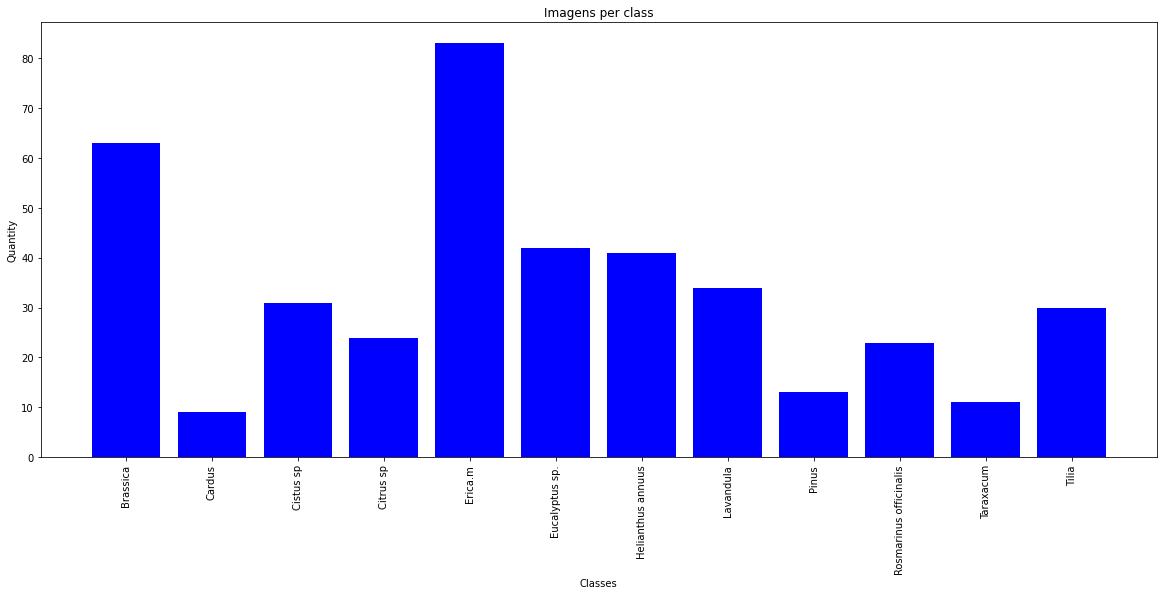

In [15]:
plt.figure(figsize=(20,8))

plt.bar(df_val_group.index, df_val_group.name.values, color='blue')
plt.xlabel('Classes')
plt.xticks(rotation=90)
plt.ylabel('Quantity')
plt.title('Imagens per class')
plt.savefig('Val_subset.png')

# for index, value in enumerate(aa):
#     plt.text(index-0.05, value+10, str(int(value)) )

In [18]:
df_train_group = df_train.groupby('labels').count()
df_train_group

name
labels                      
Brassica                1198
Cardus                   161
Cistus sp                589
Citrus sp                447
Erica.m                 1576
Eucalyptus sp.           807
Helianthus annuus        780
Lavandula                636
Pinus                    241
Rosmarinus officinalis   444
Taraxacum                215
Tilia                    575

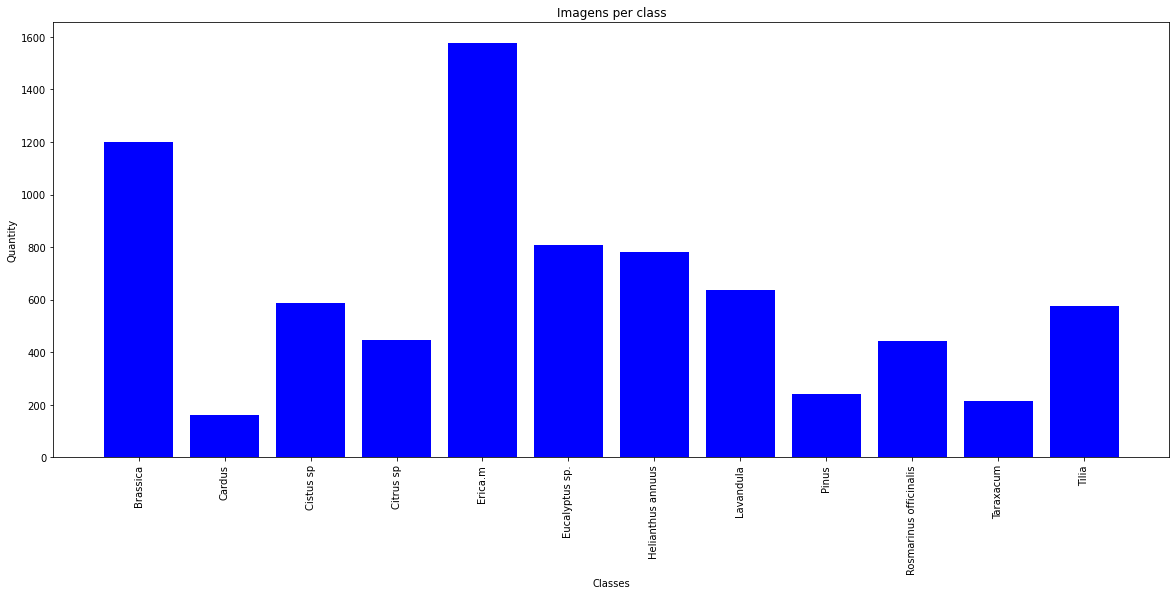

In [19]:
plt.figure(figsize=(20,8))

plt.bar(df_train_group.index, df_train_group.name.values, color='blue')
plt.xlabel('Classes')
plt.xticks(rotation=90)
plt.ylabel('Quantity')
plt.title('Imagens per class')
plt.savefig('Train_subset.png')

# for index, value in enumerate(aa):
#     plt.text(index-0.05, value+10, str(int(value)) )

In [20]:
df_test_group = df_test.groupby('labels').count()
df_test_group

name
labels                      
Brassica                 140
Cardus                    19
Cistus sp                 69
Citrus sp                 53
Erica.m                  184
Eucalyptus sp.            95
Helianthus annuus         91
Lavandula                 74
Pinus                     28
Rosmarinus officinalis    52
Taraxacum                 25
Tilia                     67

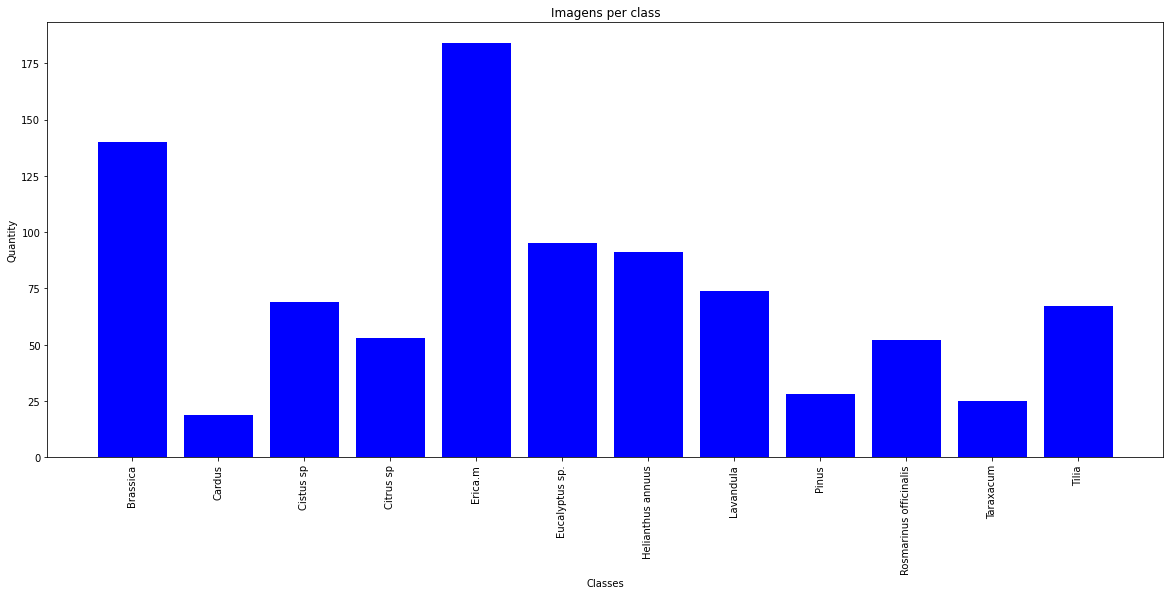

In [21]:
plt.figure(figsize=(20,8))

plt.bar(df_test_group.index, df_test_group.name.values, color='blue')
plt.xlabel('Classes')
plt.xticks(rotation=90)
plt.ylabel('Quantity')
plt.title('Imagens per class')
plt.savefig('Test_subset.png')

# for index, value in enumerate(aa):
#     plt.text(index-0.05, value+10, str(int(value)) )

# Feature Extraction using timm model

In [22]:
import timm

In [23]:
model = timm.create_model('resnet50', pretrained=True, num_classes=0, global_pool='').to('cuda')
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act1): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act2): ReLU(inplace=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act3): ReLU(inplace=True)
      (downsample): Sequen

In [49]:
df_train=pd.read_csv('List_train.csv')
df_val=pd.read_csv('List_val.csv')
df_test=pd.read_csv('List_test.csv')


In [50]:
# From https://juansensio.com/blog/062_multihead_attention
class Dataset(torch.utils.data.Dataset):
    def __init__(self, mode, df):
        self.mode = mode
        self.df = df #pd.read_csv("/content/drive/MyDrive/melanoma/compartido/isic/isic_2017_train.csv")

        self.mean_img = (0.485, 0.456, 0.406 )
        self.std_img = (0.229, 0.224, 0.225)
        self.classes = ['Pinus','Erica.m', 'Cistus sp', 'Lavandula', 'Citrus sp', 'Helianthus annuus',
                        'Eucalyptus sp.', 'Rosmarinus officinalis', 'Brassica', 'Cardus', 'Tilia', 'Taraxacum']

    def __crop_padding(self,img):
        ## convert to gray
        img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        ## set threshold for 0
        _,thresh = cv2.threshold(img_gray,10,255,cv2.THRESH_BINARY)
        ## find contours
        contours, hierarchy = cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
        cnt = contours[0]
        x,y,w,h = cv2.boundingRect(cnt)
        crop = img[y:y+h,x:x+w,:]
        return crop

    def __getitem__(self, index):
        name_img = self.df['name'].iloc[index]
        label    = self.df['labels'].iloc[index]
        ## READ IMAGE
        image = plt.imread(name_img)
        image = self.__crop_padding(image)
        target = torch.tensor(self.classes.index(label))
        # print(f'Image shape: {image.shape} \t Target:{target}')
        if self.mode=='train':
            train_augm = albumentations.Compose(
              [
               albumentations.Resize(height=320,width=320),
               albumentations.Normalize(self.mean_img, self.std_img, max_pixel_value=255.0, always_apply=True),
              #  albumentations.ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.1, rotate_limit=15),
              #  albumentations.Flip(p=0.5)
              ]
            )
            transformed = train_augm(image=image)
            image=transformed['image']
        else:
            valid_augm = albumentations.Compose(
              [
               albumentations.Resize(height=320,width=320),
               albumentations.Normalize(self.mean_img, self.std_img, max_pixel_value=255.0, always_apply=True)
              ]
            )
            transformed = valid_augm(image=image)
            image=transformed['image']

        image = torch.from_numpy(image.transpose()).float()
        target_oh = torch.nn.functional.one_hot(target, num_classes=12).float()
        data = {"image":image,
                "target_oh":target_oh,
                'target':target,
                'class_name':label } 
        # print(f'Image shape: {image.shape} \t Target:{target}')

        return data
    def __len__(self):
        return len(self.df)

class HoneyDataModule(pl.LightningDataModule):
    def __init__(self, batch_size: int = 4, Dataset = Dataset):
        super().__init__()
        self.batch_size = batch_size
        self.Dataset = Dataset
        self.train_ds =  self.Dataset(mode='train',df= df_train)
        self.val_ds   =  self.Dataset(mode='val', df= df_val)
        self.test_ds   =  self.Dataset(mode='test', df= df_test)
        
    def train_dataloader(self):
        return DataLoader(self.train_ds,
                          batch_size=24,
                          shuffle=True,
                          num_workers=0,
                          pin_memory=True,
                          drop_last=True,
                          # sampler=sampler
                          )
    def val_dataloader(self):
        return DataLoader(self.val_ds, batch_size=8, shuffle=False, num_workers=0, pin_memory=True, drop_last=True )
    def test_dataloader(self):
        return DataLoader(self.test_ds, batch_size=2, shuffle=False, num_workers=0, pin_memory=True, drop_last=True )
    
dm = HoneyDataModule(Dataset=Dataset)

In [51]:
data = next(iter(dm.train_dataloader()))
print(data['image'].shape, data['target_oh'].shape)
print(data['target'])
print(data['class_name'])


torch.Size([24, 3, 320, 320]) torch.Size([24, 12])
tensor([ 8,  2,  6,  7,  8,  1,  8,  3,  0,  6,  1,  8,  1, 10,  1,  2,  3,  6,
         4,  5,  8,  4,  1,  5])
['Brassica', 'Cistus sp', 'Eucalyptus sp.', 'Rosmarinus officinalis', 'Brassica', 'Erica.m', 'Brassica', 'Lavandula', 'Pinus', 'Eucalyptus sp.', 'Erica.m', 'Brassica', 'Erica.m', 'Tilia', 'Erica.m', 'Cistus sp', 'Lavandula', 'Eucalyptus sp.', 'Citrus sp', 'Helianthus annuus', 'Brassica', 'Citrus sp', 'Erica.m', 'Helianthus annuus']


## T-SNE reduction

In [52]:
from sklearn.manifold import TSNE
import seaborn as sns

In [53]:
n_components = 2
tsne = TSNE(n_components)


In [54]:
tsne_result_df_train = pd.DataFrame()
n_components = 2
tsne = TSNE(n_components)


for ii, data in enumerate(dm.train_dataloader()):
    # if ii == 100:
    #   break
    with torch.no_grad():
        # data = next(iter(dm.train_dataloader()))
        y = data['target'].numpy() #torch.argmax(data['target'],dim=1).numpy()
        y = y.reshape((-1,1))
        ## inference
        o = model(data['image'].to('cuda')).flatten(1).cpu().numpy()
        tsne_result = tsne.fit_transform(o)
        temp_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': y[:,0]})
        tsne_result_df_train = tsne_result_df_train.append(temp_df, ignore_index=True)
len(tsne_result_df_train)


7656

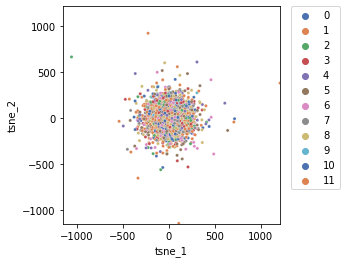

In [55]:
tsne_result = np.array([tsne_result_df_train['tsne_1'], tsne_result_df_train['tsne_2']])

fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df_train, ax=ax,s=10, palette='deep')
lim = (tsne_result.min()-5, tsne_result.max())
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
# plt.savefig('Train-tsne.png')

In [56]:
tsne_result_df_val = pd.DataFrame()
n_components = 2
tsne = TSNE(n_components)


for ii, data in enumerate(dm.val_dataloader()):

    # if ii == 100:
    #   break
    with torch.no_grad():
        # data = next(iter(dm.train_dataloader()))
        y = data['target'].numpy() #torch.argmax(data['target'],dim=1).numpy()
        y = y.reshape((-1,1))
        ## inference
        o = model(data['image'].to('cuda')).flatten(1).cpu().numpy()
        tsne_result = tsne.fit_transform(o)
        temp_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': y[:,0]})
        tsne_result_df_val = tsne_result_df_val.append(temp_df, ignore_index=True)
len(tsne_result_df_val)


400

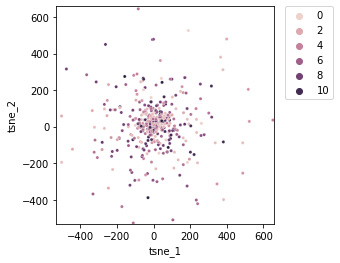

In [57]:
tsne_result = np.array([tsne_result_df_val['tsne_1'], tsne_result_df_val['tsne_2']])

fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df_val, ax=ax,s=10)
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
# plt.savefig('val-tsne.png')

In [68]:
tsne_result_df_test = pd.DataFrame()
n_components = 2
tsne = TSNE(n_components)


for ii, data in enumerate(dm.test_dataloader()):
    # if ii == 100:
    #   break
    with torch.no_grad():
        # data = next(iter(dm.train_dataloader()))
        y = data['target'].numpy() #torch.argmax(data['target'],dim=1).numpy()
        y = y.reshape((-1,1))
        ## inference
        o = model(data['image'].to('cuda')).flatten(1).cpu().numpy()
        tsne_result = tsne.fit_transform(o)
        temp_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': y[:,0]})
        tsne_result_df_test = tsne_result_df_test.append(temp_df, ignore_index=True)

len(tsne_result_df_test)


896

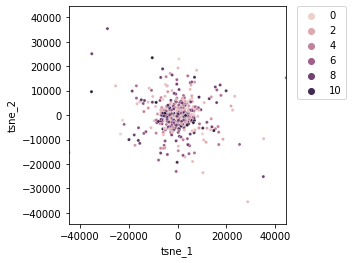

In [69]:
tsne_result = np.array([tsne_result_df_test['tsne_1'], tsne_result_df_test['tsne_2']])

fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df_test, ax=ax,s=10)
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
# plt.savefig('Test_tsne')

In [60]:
tsne_result_df_train['split'] = 'Train'
tsne_result_df_val['split'] = 'Val'
tsne_result_df_test['split'] = 'Test'


In [65]:
tsne_merge = pd.concat([tsne_result_df_train,
                        tsne_result_df_val,
                        tsne_result_df_test,
                       ], axis=0)


In [66]:
tsne_merge.shape

(8952, 4)

Text(0.5, 1.0, 'T-SNE Distribution')

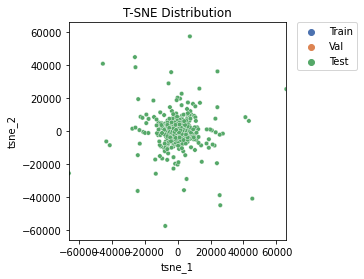

In [67]:
tsne_result = np.array([tsne_merge['tsne_1'], tsne_merge['tsne_2']])
# markers = {"Train": ".", "Val": "X", 'Test':"s"}

fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='split', data=tsne_merge, ax=ax,s=20, palette='deep')
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
ax.set_title('T-SNE Distribution')
# plt.savefig('tsne-train-val.png')

In [ ]:
tsne_merge=None